In [ ]:
# Import Libraries
import pandas as pd
import pandas as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
## Read the data
data = pd.read_csv('/content/clean_athlete.csv')

In [ ]:
## Dropping irrelevant columns
data = data[['Age', 'Sex', 'Height', 'Weight', 'region', 'City', 'Sport', 'Medal']]


In [ ]:
# Assuming 'Medal' is the column indicating the medal (0 for bronze, 1 for gold, 2 for none, 3 for silver)
gold_rows = data[data['Medal'] == 'Gold']

# Display the rows with gold medals
print(gold_rows)


        Age Sex  Height  Weight       region      City       Sport Medal
3        34   M     175      70      Denmark     Paris  Tug-Of-War  Gold
16       28   M     175      64      Finland    London  Gymnastics  Gold
18       28   M     175      64      Finland    London  Gymnastics  Gold
22       28   M     175      64      Finland    London  Gymnastics  Gold
33       27   F     163      70       Norway   Beijing    Handball  Gold
...     ...  ..     ...     ...          ...       ...         ...   ...
213729   23   M     182      90      Georgia    Athina        Judo  Gold
213751   28   F     167      60      Germany    Athina      Hockey  Gold
213758   29   M     200      93  Netherlands   Atlanta  Volleyball  Gold
213785   31   M     197      93  Netherlands   Atlanta      Rowing  Gold
213792   21   F     168      80       Russia  Helsinki   Athletics  Gold

[11456 rows x 8 columns]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213818 entries, 0 to 213817
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Age     213818 non-null  int64 
 1   Sex     213818 non-null  object
 2   Height  213818 non-null  int64 
 3   Weight  213818 non-null  int64 
 4   region  213818 non-null  object
 5   City    213818 non-null  object
 6   Sport   213818 non-null  object
 7   Medal   213818 non-null  object
dtypes: int64(3), object(5)
memory usage: 13.1+ MB


In [ ]:
value_counts = data['Medal'].value_counts()
print(value_counts)

None      179741
Gold       11456
Bronze     11409
Silver     11212
Name: Medal, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Assuming 'Medal' is the column indicating the medal (0 for bronze, 1 for gold, 2 for none, 3 for silver)

# Separate features and target variable
A = data.drop('Medal', axis=1)
B = data['Medal']# Use RandomOverSampler to balance the classes
ros = RandomOverSampler(random_state=42)
A_resampled, B_resampled = ros.fit_resample(A, B)

# Create a new balanced DataFrame
data1 = pd.concat([A_resampled, B_resampled], axis=1)

# Display the value counts of the target variable in the balanced DataFrame
print(data1['Medal'].value_counts())

None      179741
Gold      179741
Bronze    179741
Silver    179741
Name: Medal, dtype: int64


In [ ]:
print(data.columns)

Index(['Age', 'Sex', 'Height', 'Weight', 'region', 'City', 'Sport', 'Medal'], dtype='object')


In [ ]:
gold_rows = data1[data1['Medal'] == 'Bronze']

# Display the rows with gold medals
print(gold_rows)


        Age Sex  Height  Weight       region            City       Sport  \
12       30   M     175      70      Finland       Antwerpen    Swimming   
13       30   M     175      70      Finland       Antwerpen    Swimming   
15       28   M     175      64      Finland          London  Gymnastics   
24       32   M     175      64      Finland        Helsinki  Gymnastics   
41       22   F     175      70  Netherlands           Seoul      Hockey   
...     ...  ..     ...     ...          ...             ...         ...   
382145   28   M     183      70       France  Rio de Janeiro      Rowing   
382146   21   M     178      78       Russia          Moskva      Hockey   
382147   25   M     175      70       France          Athina      Rowing   
382148   26   M     170      68       Poland        Montreal    Shooting   
382149   28   F     183      70  Netherlands         Beijing        Judo   

         Medal  
12      Bronze  
13      Bronze  
15      Bronze  
24      Bronze  
41

In [ ]:
# Assuming 'Medal' is the column indicating the medal (0 for bronze, 1 for gold, 2 for none, 3 for silver)
gold_rows = data1[data1['Medal'] == 'None']

# Display the rows with gold medals
print(gold_rows)

        Age Sex  Height  Weight       region            City       Sport Medal
0        24   M     180      80        China       Barcelona  Basketball  None
1        23   M     170      60        China          London        Judo  None
2        24   M     175      70      Denmark       Antwerpen    Football  None
4        18   F     168      70  Netherlands     Los Angeles   Athletics  None
5        18   F     168      70  Netherlands     Los Angeles   Athletics  None
...     ...  ..     ...     ...          ...             ...         ...   ...
213813   27   M     168      76    Argentina          Athina      Hockey  None
213814   21   M     175      75          USA          Munich    Football  None
213815   24   M     183      72       Russia          Sydney      Rowing  None
213816   28   M     183      72       Russia          Athina      Rowing  None
213817   33   F     171      69      Belarus  Rio de Janeiro  Basketball  None

[179741 rows x 8 columns]


In [ ]:
# set aside and save unseen data set
data_unseen = data1.sample(n=10000)
data = data1.drop(data_unseen.index)
print(f'Data for model: {data.shape},\nData for unseen predictions: {data_unseen.shape}')
data_unseen.to_csv('/content/olympics_unseen.csv', index=False)

Data for model: (708964, 8),
Data for unseen predictions: (10000, 8)


In [ ]:

# Data preprocessing
X = data1.loc[:, data1.columns != 'Medal']
y = data1['Medal']



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718964 entries, 0 to 718963
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Age     718964 non-null  int64 
 1   Sex     718964 non-null  object
 2   Height  718964 non-null  int64 
 3   Weight  718964 non-null  int64 
 4   region  718964 non-null  object
 5   City    718964 non-null  object
 6   Sport   718964 non-null  object
dtypes: int64(3), object(4)
memory usage: 38.4+ MB


In [ ]:
X.head()

,Age,Sex,Height,Weight,region,City,Sport
0,24,M,180,80,China,Barcelona,Basketball
1,23,M,170,60,China,London,Judo
2,24,M,175,70,Denmark,Antwerpen,Football
3,34,M,175,70,Denmark,Paris,Tug-Of-War
4,18,F,168,70,Netherlands,Los Angeles,Athletics


In [ ]:
# Encode the 'Medal' column to integers using Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
 #Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_test

array([1, 0, 3, ..., 2, 2, 1])

In [ ]:
# Encoding
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipe = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='N/A'),
    OneHotEncoder(handle_unknown='ignore', sparse=False)
)

full_pipe = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier(
     n_jobs=-1,  # Use all available CPU cores
    n_estimators=100,  # Adjust the number of trees in the forest
    max_depth=100,  # Adjust the maximum depth of trees (None means unlimited)
    min_samples_split=2,  # Minimum samples required to split an internal node
    min_samples_leaf=1,  # Minimum samples required to be at a leaf node
    max_features=3,  # Number of features to consider when looking for the best split
    random_state=42  # Random seed for reproducibility
)


# Build the model pipeline (if you have preprocessing steps)
random_forest_olympics = make_pipeline(full_pipe, random_forest_model)

# Train the model
random_forest_olympics.fit(X_train, y_train)

tr = str(random_forest_olympics.score(X_train, y_train) * 100)
print("Training Score:", tr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Training Score: 93.03233299314465


In [ ]:
# Import XGBoost
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(
   n_jobs=-1,
    n_estimators=100,  # Adjust the number of boosting rounds
    max_depth=50,       # Adjust the maximum depth of trees
    learning_rate=0.1,  # Adjust the learning rate
    subsample=1.0,     # Adjust the subsample ratio
    colsample_bytree=1.0,  # Adjust the feature subsample ratio
    gamma=0.8,         # Adjust the regularization term
    scale_pos_weight=10,  # Adjust class weight balance
    objective='multi:softprob',  # Specify the objective for multi-class classification
    eval_metric='mlogloss'  # Specify the evaluation metric
)


# Train the model and evaluate as before
# Build the model
xgboost_olympics = make_pipeline(full_pipe, xgboost_model)

# Train the model
xgboost_olympics.fit(X_train, y_train)
tr1 = str(xgboost_olympics.score(X_train, y_train) * 100)
print("Training Score:", tr1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:01:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Training Score: 93.03233299314465


In [ ]:
# Make predictions on the test set
y_pred = random_forest_olympics.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Random Forest Accuracy: {accuracy * 100:.1f}%')
print(f'Random Forest Precision: {precision * 100:.1f}%')
print(f'Random Forest Recall: {recall * 100:.1f}%')

Random Forest Accuracy: 91.8%
Random Forest Precision: 92.0%
Random Forest Recall: 91.8%


In [ ]:
tr = str(random_forest_olympics.score(X_train, y_train) * 100)
ts = str(random_forest_olympics.score(X_test, y_test) * 100)
print("Training Score:", tr)
print("Testing Score:", ts)


In [ ]:
# Make predictions on the test set
y_pred = xgboost_olympics.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100:.1f}%')
print(f'Precision: {precision * 100:.1f}%')
print(f'Recall: {recall * 100:.1f}%')

Accuracy: 91.1%
Precision: 91.5%
Recall: 91.1%


In [ ]:
tr = str(xgboost_olympics.score(X_train, y_train) * 100)
ts = str(xgboost_olympics.score(X_test, y_test) * 100)
print("Training Score:", tr)
print("Testing Score:", ts)


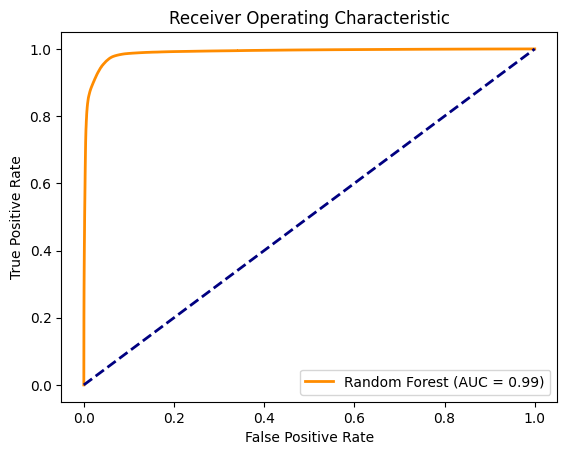

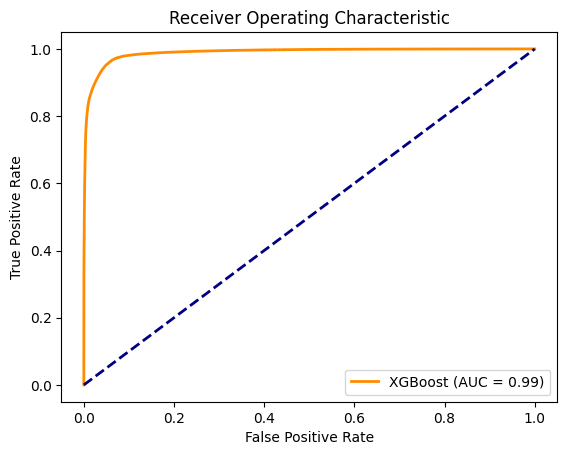

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=list(set(y_test)))

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test_bin, label):
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{label} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for Random Forest
plot_roc_curve(random_forest_olympics, X_test, y_test_bin, 'Random Forest')

# Plot ROC curve for XGBoost
plot_roc_curve(xgboost_olympics, X_test, y_test_bin, 'XGBoost')





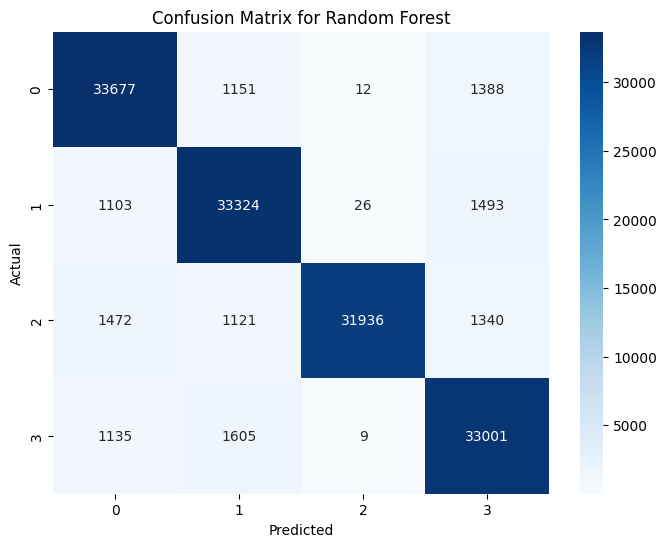

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set for Random Forest
y_pred_rf = random_forest_olympics.predict(X_test)

# Create a confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_olympics.classes_, yticklabels=random_forest_olympics.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


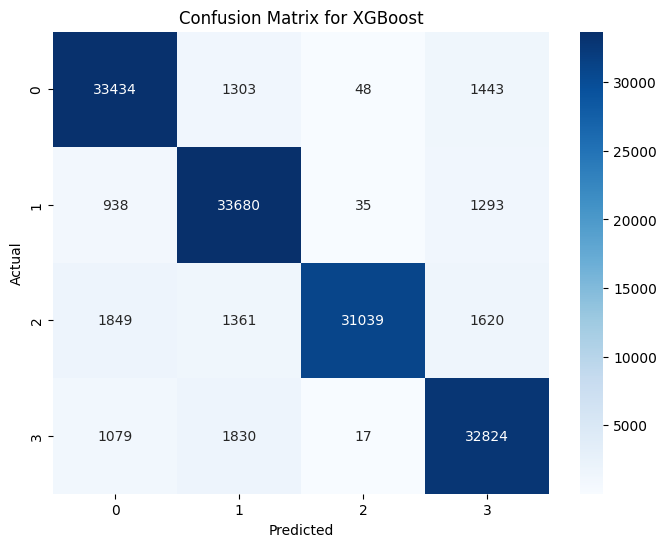

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set for XGBoost
y_pred_xgb = xgboost_olympics.predict(X_test)

# Create a confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xgboost_olympics.classes_, yticklabels=xgboost_olympics.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()


In [ ]:
import joblib
joblib.dump(random_forest_olympics, 'olympics.pkl')


['olympics.pkl']

In [ ]:
model = joblib.load('olympics.pkl')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='N/A',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'region', 'City',
                                                   'Sport'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=100, max_features=3,
                                        n_jobs=-1, random_state=42))])

In [ ]:
from google.colab import files
import joblib
model_filename="olympics.pkl"

In [ ]:
joblib.dump(model,model_filename)
files.download('olympics.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
new_dat = pd.read_csv('/content/olympics_unseen.csv')
new_dat.head()

,Age,Sex,Height,Weight,region,City,Sport,Medal
0,21,M,206,104,USA,Sydney,Baseball,Gold
1,28,M,175,70,France,Amsterdam,Weightlifting,Bronze
2,17,M,175,70,Sweden,Stockholm,Swimming,Silver
3,25,F,168,61,Canada,Sydney,Athletics,None
4,30,M,175,70,Belgium,Berlin,Fencing,None


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Medal' is the column you want to convert
medal_column = new_dat['Medal']

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Medal' column to numeric values
numeric_medal = label_encoder.fit_transform(medal_column)

# Replace the original 'Medal' column with the numeric values
new_dat['Medal'] = numeric_medal



In [ ]:
new_dat.head()

,Age,Sex,Height,Weight,region,City,Sport,Medal
0,21,M,206,104,USA,Sydney,Baseball,1
1,28,M,175,70,France,Amsterdam,Weightlifting,0
2,17,M,175,70,Sweden,Stockholm,Swimming,3
3,25,F,168,61,Canada,Sydney,Athletics,2
4,30,M,175,70,Belgium,Berlin,Fencing,2


In [ ]:
pred = random_forest_olympics.predict(new_dat)
pred

array([1, 0, 3, ..., 0, 2, 2])

In [ ]:
new_dat['pred'] = pred
new_dat

,Age,Sex,Height,Weight,region,City,Sport,Medal,pred
0,21,M,206,104,USA,Sydney,Baseball,1,1
1,28,M,175,70,France,Amsterdam,Weightlifting,0,0
2,17,M,175,70,Sweden,Stockholm,Swimming,3,3
3,25,F,168,61,Canada,Sydney,Athletics,2,2
4,30,M,175,70,Belgium,Berlin,Fencing,2,2
...,...,...,...,...,...,...,...,...,...
9995,24,F,179,72,Germany,Montreal,Athletics,1,1
9996,22,M,183,77,Russia,Roma,Athletics,2,2
9997,37,M,175,70,Brazil,Antwerpen,Shooting,0,0
9998,33,M,175,70,Senegal,Mexico City,Basketball,2,2


In [ ]:
accuracy = accuracy_score(new_dat.Medal, pred)
print(f'Accuracy: {accuracy*100:,.1f}%')

Accuracy: 92.4%
